# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

# Model Architecture

We use a Actor-Critic architecture in the project.

## Actor Architecture

The actor architecture mainly consists of 3 fully connected layers.

The input state is passed through a linear layer. Then this is batch-normalized and activated through a ReLU activation function. This, in turn is passed through the second linear layer with ReLU activation. Finally, the output is passed through the third linear layer activated through a tanh activation function to get the output between -1 to 1.

## Critic Architecture

The critic architecture mainly consists of 3 fully connected layers.

Initially, the state is passed through a linear layer, batch-normalized and passed through a ReLU activation function. Then we concatenate the action with this output. The concated value is passed thorough the second linear layer and a ReLU activation function. Finally, this is passed through a third fully connected linear layer to output its value estimate of the action value function.

# Hyperparameters

For both the actor and the critic, we use 128 nodes in the first hidden layer and 256 nodes in the second hidden layer. We initialize the hidden layers' weights with the Xavier's method.

The other hyperparameters for the agent are as follows:

1. **BUFFER_SIZE** = int(1e6)  # replay buffer size
2. **BATCH_SIZE** = 256  # minibatch size
3. **GAMMA** = 0.99  # discount factor
4. **TAU** = 1e-3  # for soft update of target parameters
5. **LR_ACTOR** = 1e-3  # learning rate of the actor
6. **LR_CRITIC** = 1e-3  # learning rate of the critic
7. **UPDATE_EVERY** = 1  # How many iterations to wait before updating target networks
8. **GRAD_CLIPPING** = 1.0  # gradient clipping

**Ornstein-Uhlenbeck noise parameters**

9. **OU_SIGMA** = 0.1
10. **OU_THETA** = 0.15
11. **EPSILON** = 1.0  # for epsilon in the noise process (act step)
12. **EPSILON_DECAY** = 1e-6


In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64")

Found path: /home/sagarnildass/python_notebooks/Udacity-Deep-Reinforcement-Learning/my_codes/p3_collab-compet/Tennis_Linux/Tennis.x86_64
Mono path[0] = '/home/sagarnildass/python_notebooks/Udacity-Deep-Reinforcement-Learning/my_codes/p3_collab-compet/Tennis_Linux/Tennis_Data/Managed'
Mono config path = '/home/sagarnildass/python_notebooks/Udacity-Deep-Reinforcement-Learning/my_codes/p3_collab-compet/Tennis_Linux/Tennis_Data/MonoBleedingEdge/etc'
Preloaded 'ScreenSelector.so'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	ScreenSelector.so
	libgrpc_csharp_ext.x86.so
Logging to /home/sagarnildass/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [22]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.10000000149011612


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import numpy as np
import random
import time
import torch

import matplotlib.pyplot as plt
%matplotlib inline

from collections import deque
from agent import Agent

# 1. Training

# A) DDPG with Experience Replay

The DDPG (Deep Deterministic Policy Gradient) algorithm is an off-policy algorithm based on Actor-Critic network. In DDPG, the Critic is used to approximate the maximizer over the Q-values of the next state. One of the limitations of DQN is that it is not straightforward to use in continuous action spaces.

In DDPG, we use two neural networks - the Actor and the Critic. The actor is tasked with approximating the optimal policy deterministically. The critic is tasked with evaluating the optimal action value function, by using the actor's best believed action.

Three other interesting aspects of DDPG are:

1. The use of a Replay Buffer - The use of a Replay Buffer helps us to decorrelate states and actions by randomly sampling from a batch of states, actions, rewards and next states, gathered over time.


2. Soft updates to the target network - In DDPG, we have two copies of the network weights. 

    a) A regular for both actor and the critic
    
    b) A target for both actor and the critic
    
    But in DDPG, the weights are updated using a soft update strategy. A soft update strategy consists of slowly blending our regular network weights with our target network weights.
    
    
3. To implement better exploration by the Actor network, we use noisy perturbations, specifically an Ornstein-Uhlenbeck process for generating noise, as described in the paper. It samples noise from a correlated normal distribution.

The DDPG algorithm pseducode is as follows:

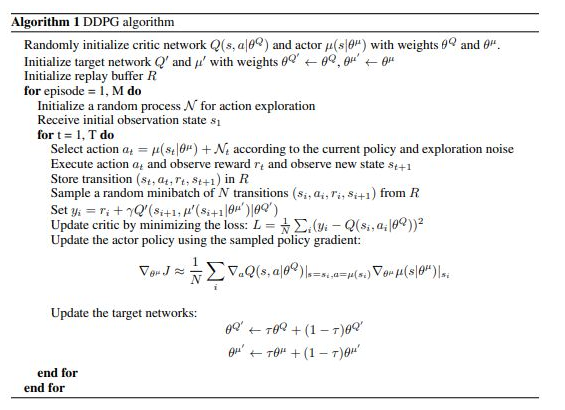


## 1. Training

In [8]:
# DDPG function
def ddpg(num_episodes=10000, max_t=1000, print_every=10):
    """Deep Deterministic Policy Gradient
    
    Params
    ======
    n_episodes (int): maximum number of training episodes
    max_t (int): maximum number of timesteps per episode
    print_every (int): interval to display results
    
    """
    max_scores = [] # list of mean scores from each episode
    moving_avgs = [] # list of moving averages
    best_score = -np.inf
    scores_window = deque(maxlen=100) # mean score from last 100 episodes
    initial_time = time.time()
    
    for i_episode in range(1, num_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name] # reset environment
        states = env_info.vector_observations # get current state for each observations
        scores = np.zeros(num_agents) # initialize score for each agent
        agent.reset()
        start_time = time.time()
        for t in range(max_t):
            actions = agent.act(states, add_noise=True) # select an action
            env_info = env.step(actions)[brain_name]  # send all actions to tne environment
            next_states = env_info.vector_observations # get next state (for each agent)
            rewards = env_info.rewards # get reward (for each agent)
            dones = env_info.local_done # see if episode finished
            # perform learning step
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
            states = next_states
            scores += rewards
            if np.any(dones):
                break
        duration = time.time() - start_time
        max_scores.append(np.max(scores)) # save max score for each episode
        scores_window.append(max_scores[-1]) # save max score to window
        moving_avgs.append(np.mean(scores_window)) # save moving average
        
        if i_episode % print_every == 0:
            print("\rEpisode {} ({}s)\tMax score: {:.3f}\tMoving Avg: {:.3f}"\
                  .format(i_episode, round(duration), max_scores[-1], moving_avgs[-1]))
        if moving_avgs[-1] >= 0.5:
            print("\nEnvironment solved in {:d} episodes.\tAverage score: {:.3f}\tTotal training time: {}s"\
                 .format(i_episode, moving_avgs[-1], (time.time()-initial_time)))
            torch.save(agent.actor_local.state_dict(), 'tennis_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'tennis_critic.pth')
            break
            
    return max_scores, moving_avgs
    

In [9]:
# start the training loop
agent = Agent(state_size=state_size, action_size=action_size, random_seed=42)

In [10]:
scores, avgs = ddpg()

Episode 10 (2s)	Max score: 0.000	Moving Avg: 0.000
Episode 20 (5s)	Max score: 0.100	Moving Avg: 0.019
Episode 30 (9s)	Max score: 0.100	Moving Avg: 0.022
Episode 40 (2s)	Max score: 0.000	Moving Avg: 0.027
Episode 50 (5s)	Max score: 0.000	Moving Avg: 0.025
Episode 60 (5s)	Max score: 0.100	Moving Avg: 0.029
Episode 70 (2s)	Max score: 0.000	Moving Avg: 0.028
Episode 80 (3s)	Max score: 0.000	Moving Avg: 0.026
Episode 90 (14s)	Max score: 0.200	Moving Avg: 0.030
Episode 100 (3s)	Max score: 0.000	Moving Avg: 0.034
Episode 110 (8s)	Max score: 0.100	Moving Avg: 0.045
Episode 120 (22s)	Max score: 0.200	Moving Avg: 0.061
Episode 130 (4s)	Max score: 0.100	Moving Avg: 0.080
Episode 140 (48s)	Max score: 0.700	Moving Avg: 0.127
Episode 150 (22s)	Max score: 0.300	Moving Avg: 0.151
Episode 160 (6s)	Max score: 0.100	Moving Avg: 0.163
Episode 170 (6s)	Max score: 0.100	Moving Avg: 0.185
Episode 180 (2s)	Max score: 0.000	Moving Avg: 0.205
Episode 190 (11s)	Max score: 0.200	Moving Avg: 0.224
Episode 200 (5s)

# 2. Plot Rewards

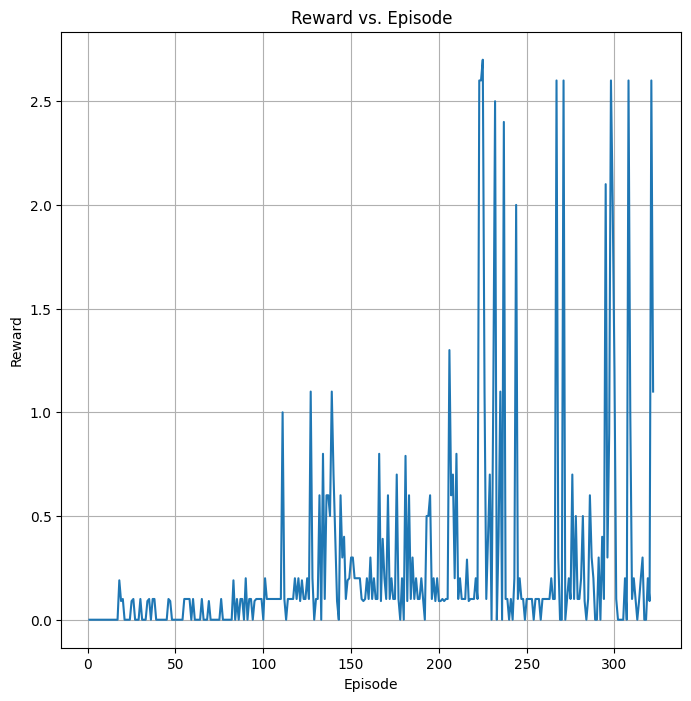

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.title('Reward vs. Episode')
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.grid(True)      
plt.show()

# 3. Watch a smart agent play

In [21]:
agent.actor_local.load_state_dict(torch.load('tennis_actor.pth'))
agent.critic_local.load_state_dict(torch.load('tennis_critic.pth'))


env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents) 
agent.reset()   
while True:
    actions = agent.act(states)
    env_info = env.step(actions)[brain_name]
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states           
    if np.any(dones):
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))   

Total score (averaged over agents) this episode: 1.145000017248094


In [23]:
env.close()